# Dominant Poles - F8 Example

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf,step, tf2ss, ss2tf, bode
from control import balred
import control

import numpy as np
from math import pi

import control
import control.matlab
from control import ss2tf
from control_materials import *

Basic file found
Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
This is a library of useful functions for control systems


# F-8E Example

In [2]:
s = tf('s')
num = 964*(s/0.797+1)*(-s/38.8+1)*(s/36+1)
den = ((s/3.59)**2 + 2*(0.28)/3.59*s + 1)*((s/0.032)**2 + 2*(0.18)/0.032*s + 1)
P = num/den
N = 2

P

TransferFunction(array([ -12.722,   25.483,  17798.910,  14163.104]), array([ 1113.250,  2250.902,  14374.595,  167.577,   14.692]))

In [3]:
# Very Crude Approximation
num_rr = 964
den_rr = ((s/0.032)**2 + 2*(0.18)/0.032*s + 1)
Prr = num_rr/den_rr
Prr

TransferFunction(array([   0.987]), array([   1.000,    0.012,    0.001]))

In [4]:
#More Advanced Approx covered in 16.30
Pss = tf2ss(P)
if slycot_available:
    Pss_reduced = control.matlab.balred(Pss, N)
else:
    Pss_reduced = Pss
Pr = near_zero(ss2tf(Pss_reduced.A,Pss_reduced.B,Pss_reduced.C,Pss_reduced.D))
Pr

TransferFunction(array([  -0.011,    0.023,   15.988,   12.722]), array([   1.000,    2.022,   12.912,    0.151,    0.013]))

In [5]:
Pr.num[0][0]/Pr.den[0][0][2]

array([  -0.001,    0.002,    1.238,    0.985])

In [6]:
G = balred(P, N, DCmatch = False)
G

TransferFunction(array([   1.078,    0.988]), array([   1.000,    0.012,    0.001]))

In [7]:
G.num[0][0]/G.den[0][0][2]

array([ 1052.723,  964.246])

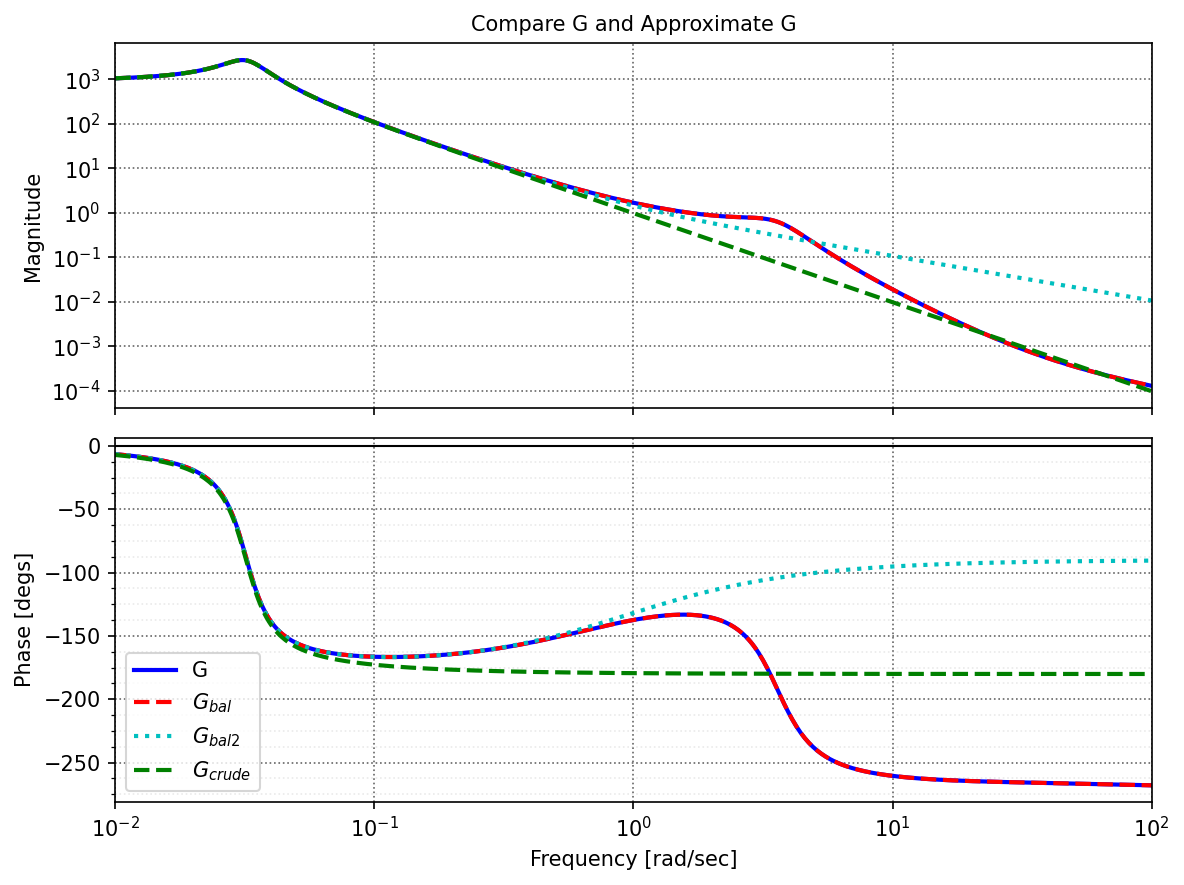

In [8]:
gain, phase, w = bode(P, logspace(-2,2,500),plot=False)
gainr, phaser, wr = bode(Pr, logspace(-2,2,500),plot=False)
gaing, phaseg, wg = bode(G, logspace(-2,2,500),plot=False)
gainrr, phaserr, wrr = bode(Prr, logspace(-2,2,500),plot=False)

fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
ax[0].loglog(w,gain,'b-',label='G')
ax[0].loglog(wr,gainr,'r--',label=r'$G_{bal}$')
ax[0].loglog(wg,gaing,'c:',label=r'$G_{bal2}$')
ax[0].loglog(wrr,gainrr,'g--',label=r'$G_{crude}$')

ax[1].semilogx(w,phase*r2d,'b-',label='G')
ax[1].semilogx(wr,phaser*r2d,'r--',label=r'$G_{bal}$')
ax[1].semilogx(wg,phaseg*r2d,'c:',label=r'$G_{bal2}$')
ax[1].semilogx(wrr,phaserr*r2d,'g--',label=r'$G_{crude}$')

ax[1].set_xlabel("Frequency [rad/sec]")
ax[1].set_ylabel("Phase [degs]")

ax[0].set_ylabel("Magnitude")
ax[0].set_title("Compare G and Approximate G")
plt.legend()
nicegrid(ax)
savefig("./figs/DP_Ex41.pdf", dpi=600)
plt.show()

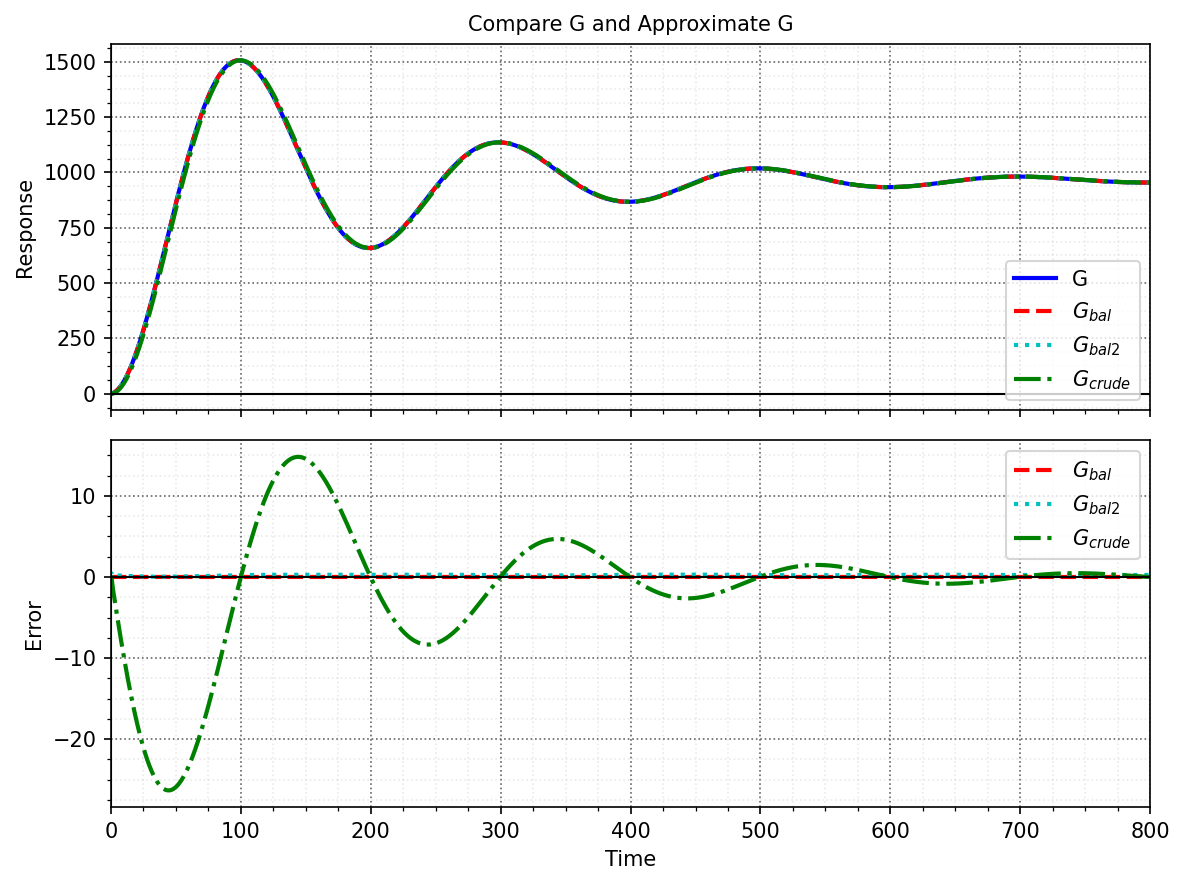

In [9]:
fig, ax = plt.subplots(2,1,figsize=(8, 6),dpi=150,sharex = True)
y,t = step(P,800)
yr,tr = step(Pr,t)
yrg,trg = step(G,t)
yrr,trr = step(Prr,t)

ax[0].plot(t,y,'b',label='G')
ax[0].plot(tr,yr,'r--',label=r'$G_{bal}$')
ax[0].plot(trg,yrg,'c:',label=r'$G_{bal2}$')
ax[0].plot(trr,yrr,'g-.',label=r'$G_{crude}$')
ax[1].set_xlabel("Time")
ax[1].plot(t,yr-y,'r--',label=r'$G_{{bal}}$')
ax[1].plot(t,yrg-y,'c:',label=r'$G_{{bal2}}$')
ax[1].plot(t,yrr-y,'g-.',label=r'$G_{crude}$')
ax[0].set_ylabel("Response")
ax[1].set_ylabel("Error")
ax[0].legend()
ax[1].legend()
ax[0].set_title("Compare G and Approximate G")
nicegrid(ax)
savefig("./figs/DP_Ex42.pdf", dpi=600)
plt.show()